# Estudo de Caso 3

## Análise Exploratória e Data Wrangling Para E-Commerce Analytics

In [105]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [123]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [124]:
# Carregando o Dataset
df = pd.read_csv('dataset.csv')

In [125]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [126]:
df.shape

(11000, 12)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [128]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
9804,9805,D,Navio,3,2,255,4,baixa,F,8,5511,0
1196,1197,A,Navio,4,2,187,4,media,M,49,3225,1
1257,1258,B,Navio,3,5,219,3,baixa,F,54,3145,1
488,489,A,Navio,7,5,192,3,baixa,M,46,1550,1
8765,8766,F,Aviao,3,5,179,3,baixa,M,2,4913,0


## EDA - Parte 1

In [129]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [130]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [131]:
# Lista de colunas categóricas
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [132]:
# Lista de colunas numéricas
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']

In [133]:
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [134]:
target = ['entregue_no_prazo']

## Explorando as Variáveis Numéricas

In [135]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


#### Algumas observações:

#### As colunas numero_chamadas_cliente, avaliacao_cliente e custo_produto parecem ter uma distribuição bastente simétrica (média e mediana são próximas).

#### As colunas compras_anteriores e desconto parecem estar inclinadas para a direita (média maior que a mediana)

#### A coluna peso_gramas parece estar inclinada para a esquerda (média menor que a mediana).

<AxesSubplot:>

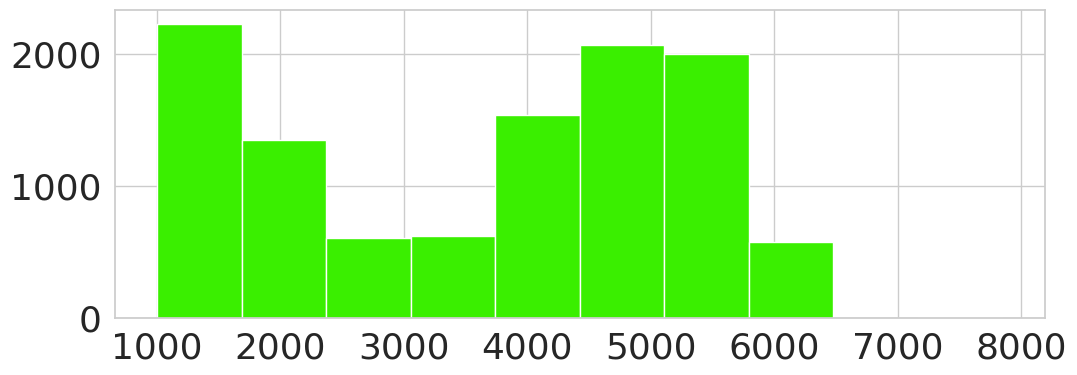

In [136]:
# Construindo um histograma para analisar se minhas observações estão corretas
df['peso_gramas'].hist()

## Explorando as Variáveis Categóricas

In [137]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


### Algumas observações?

#### F é o corredor com produtos mais vendidos.
#### Navio é o transporte que domina as entregas.
#### Prioridade Baixa é a que domina entre as prioridades de produto.
#### O genero feminino é o que mais compra.
#### Todos os valores únicos estão entre 2-5 valores únicos.

In [138]:
# Listando o total por categoria de cada variável categórica:
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



### Análise Univariada - Box Plots

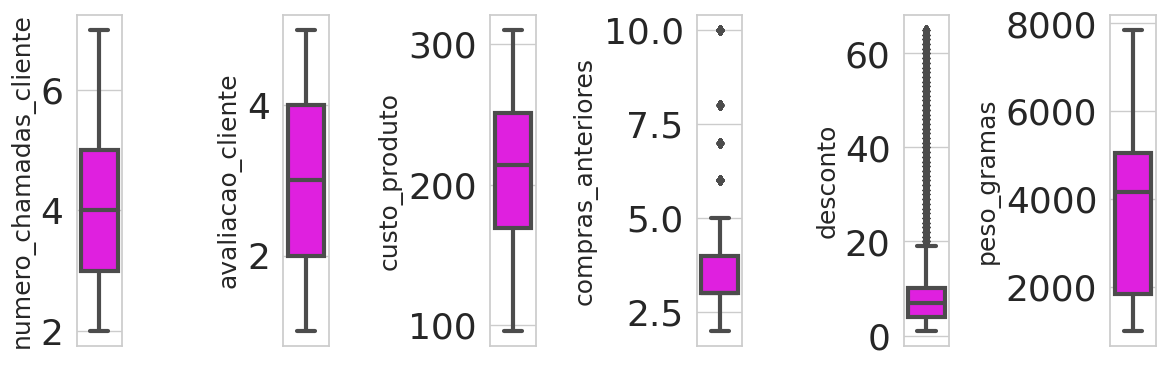

In [139]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### Análise Univariada - Dist Plots

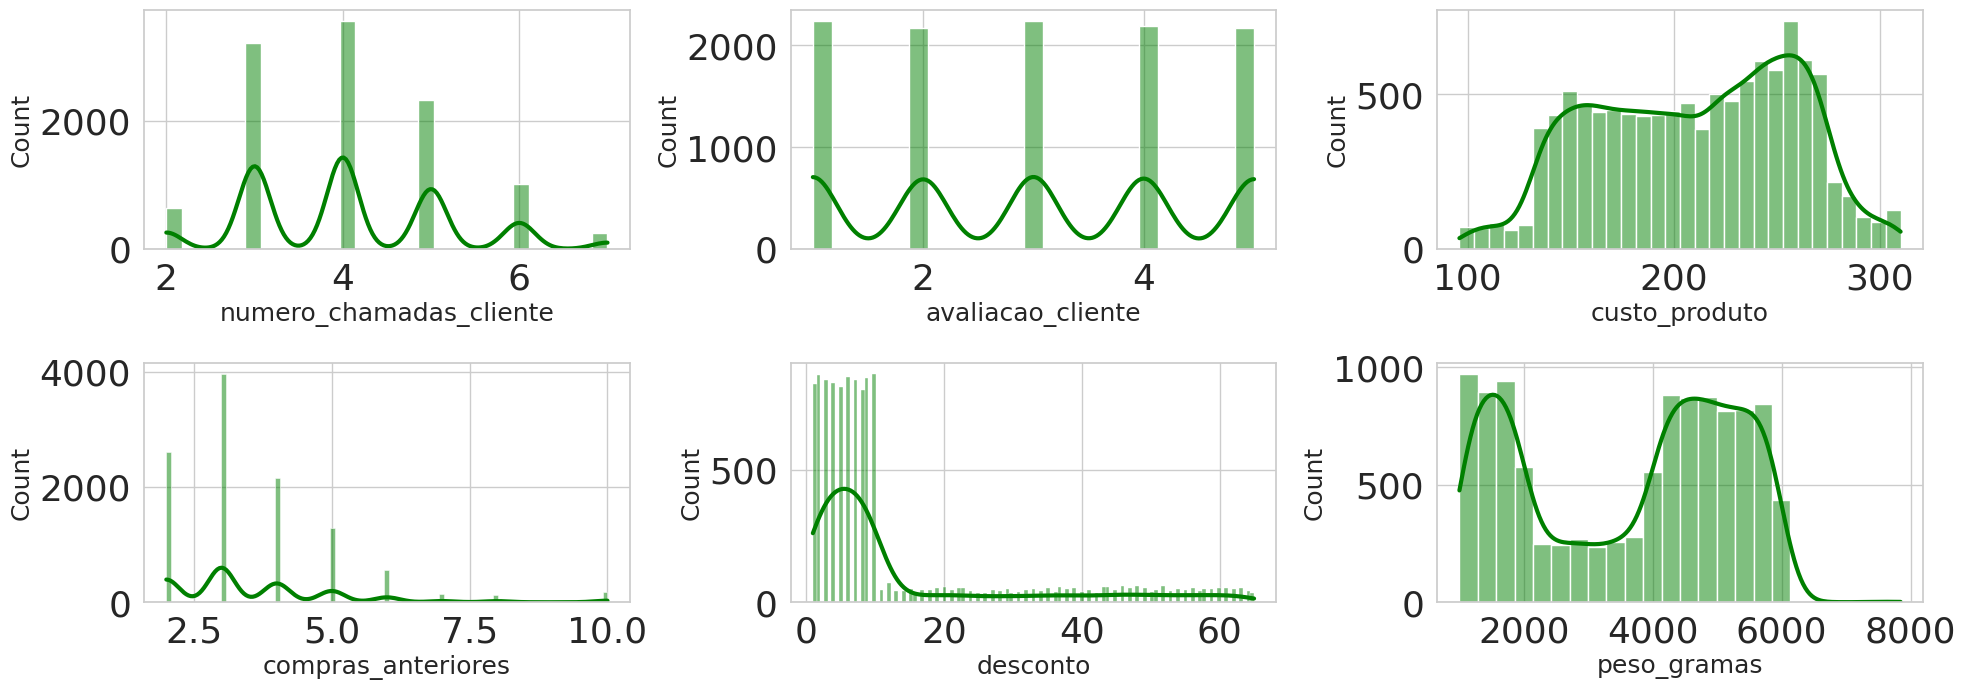

In [140]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, int(len(nums)/2), i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()
              

### Análise Univariada - Violin Plots

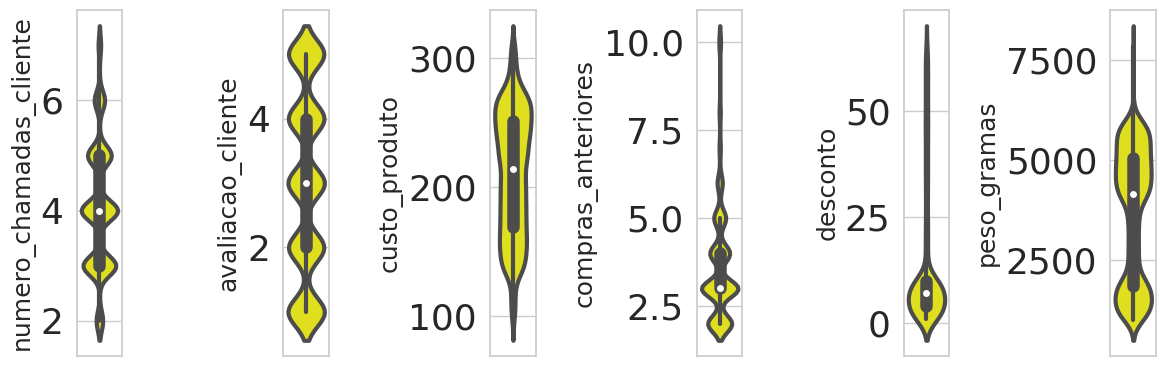

In [141]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

#### A partir dos gráficos pode-se observar que:

##### A coluna custo-produto parece estar próxima de uma distribuição normal.
##### Como suspeitamos, as colunas compras_anteriores e desconto estão ligeiramente inclinadas, o que significa que existe a possibilidade de precisarmos fazer algum ajuste nessas colunas mais tarde
##### Para a coluna peso_gramas há incerteza de distribuição porque é em forma de U
##### As colunas numero_chamadas_cliente e avaliacao_cliente estão distribuídas uniformimente.

### Análise Univariada - Count Plot (Categorical)

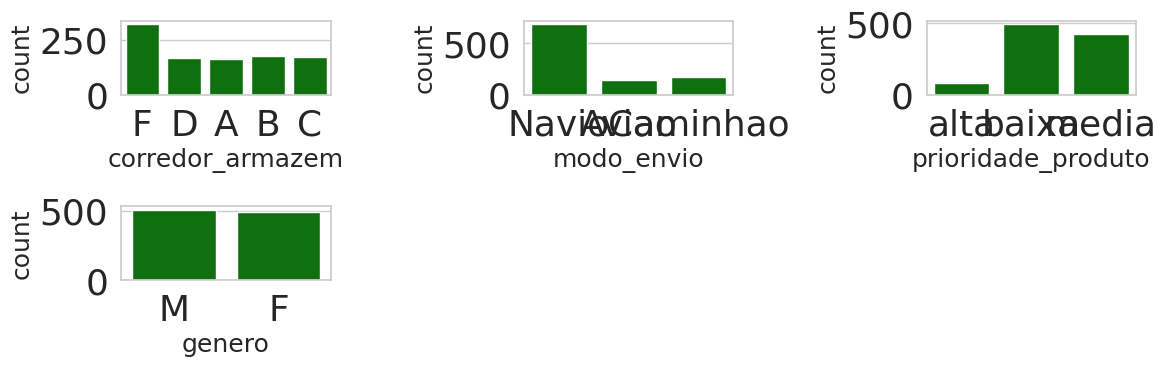

In [142]:
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

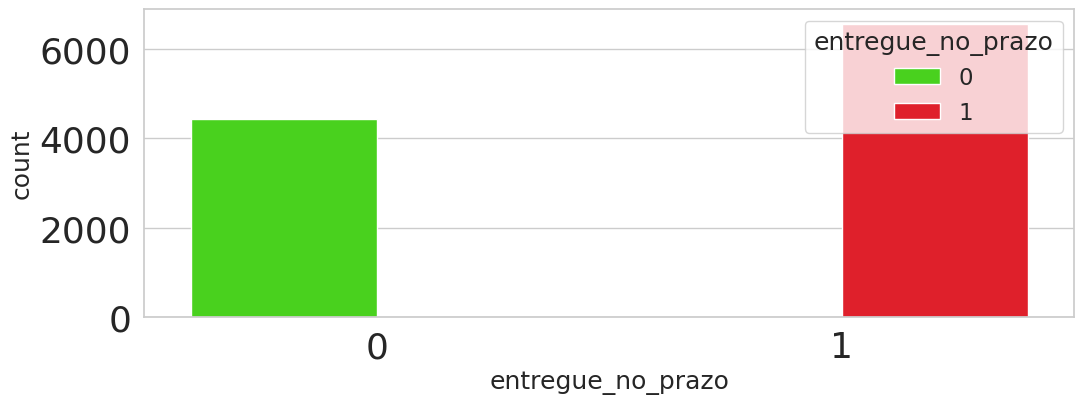

In [143]:
# Count plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

A partir dos gráficos pode-se observar que:

- A maioria dos produtos enviados vieram do corredor F.
- Modo de envio através de Navio é o mais comum.
- Há poucos produtos com prioridade alta de entrega.
- A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.
- A coluna entregue_no_prazo é binária, então não há necessidade de prestar muita atenção na sua forma de distribuição

### Anaálise Bivariada - Mapa de Correlação

In [144]:
corr_df = df[nums].corr()
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

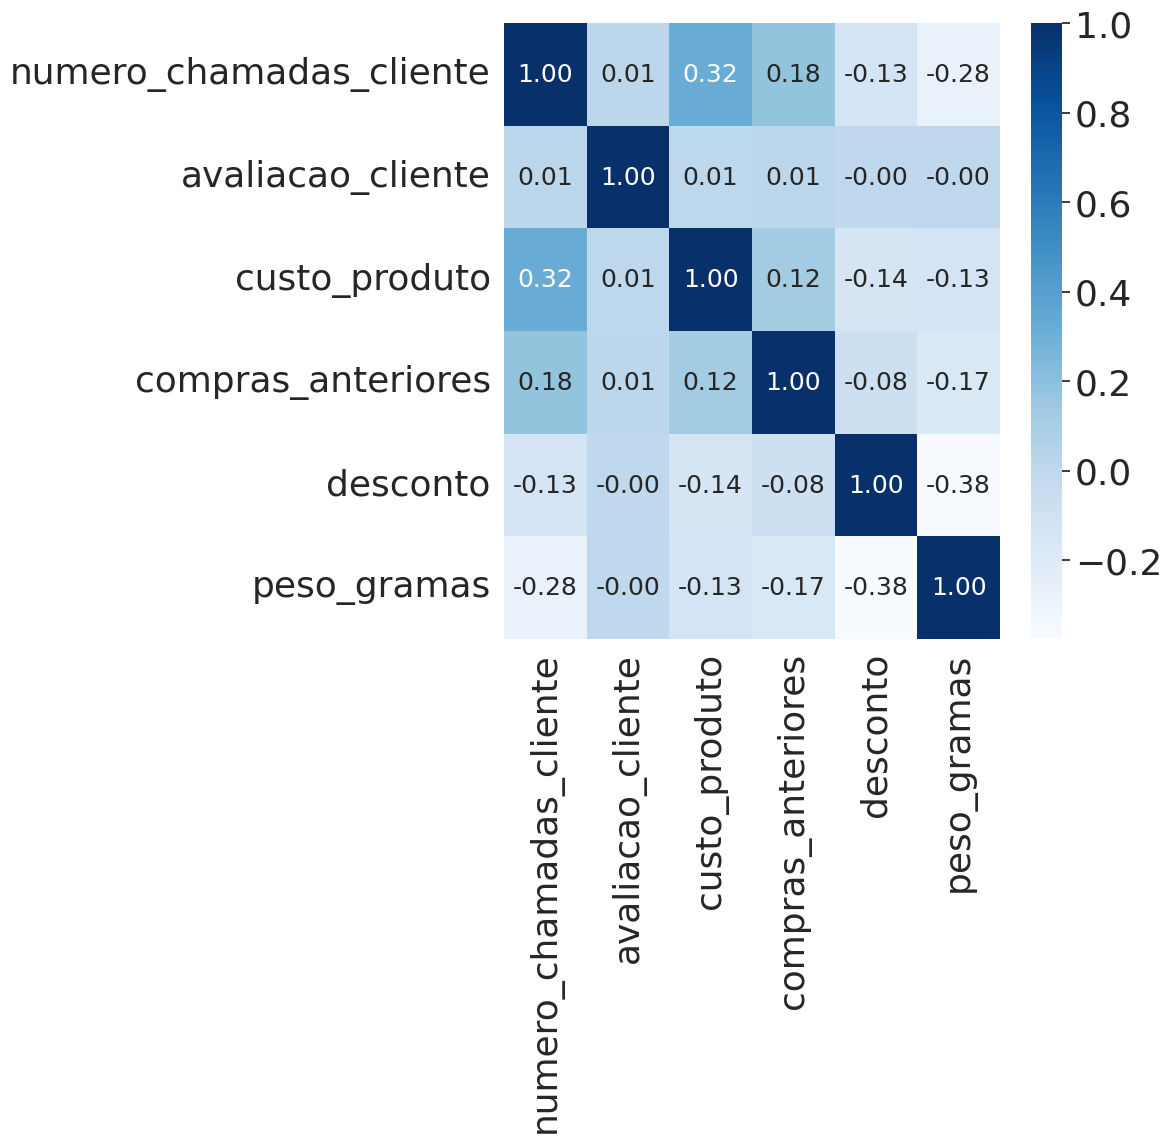

In [145]:
plt.figure(figsize = (8, 8))
sns.heatmap(df[nums].corr(), cmap = 'Blues', annot = True, fmt = '.2f')

Conclusões do mapa de correlação:

- As variáveis desconto e peso_gramas possuem uma correlação negativa.
- As variáveus numero_chamadas_cliente e custo_produto possuem uma correlação positiva.
- As variáveis numero_chamadas_cliente e compras_anteriores possuem uma correlação positiva.
- As variáveis numero_chadas_cliente e peso_gramas possuem uma correlação nagativa

## Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

## Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

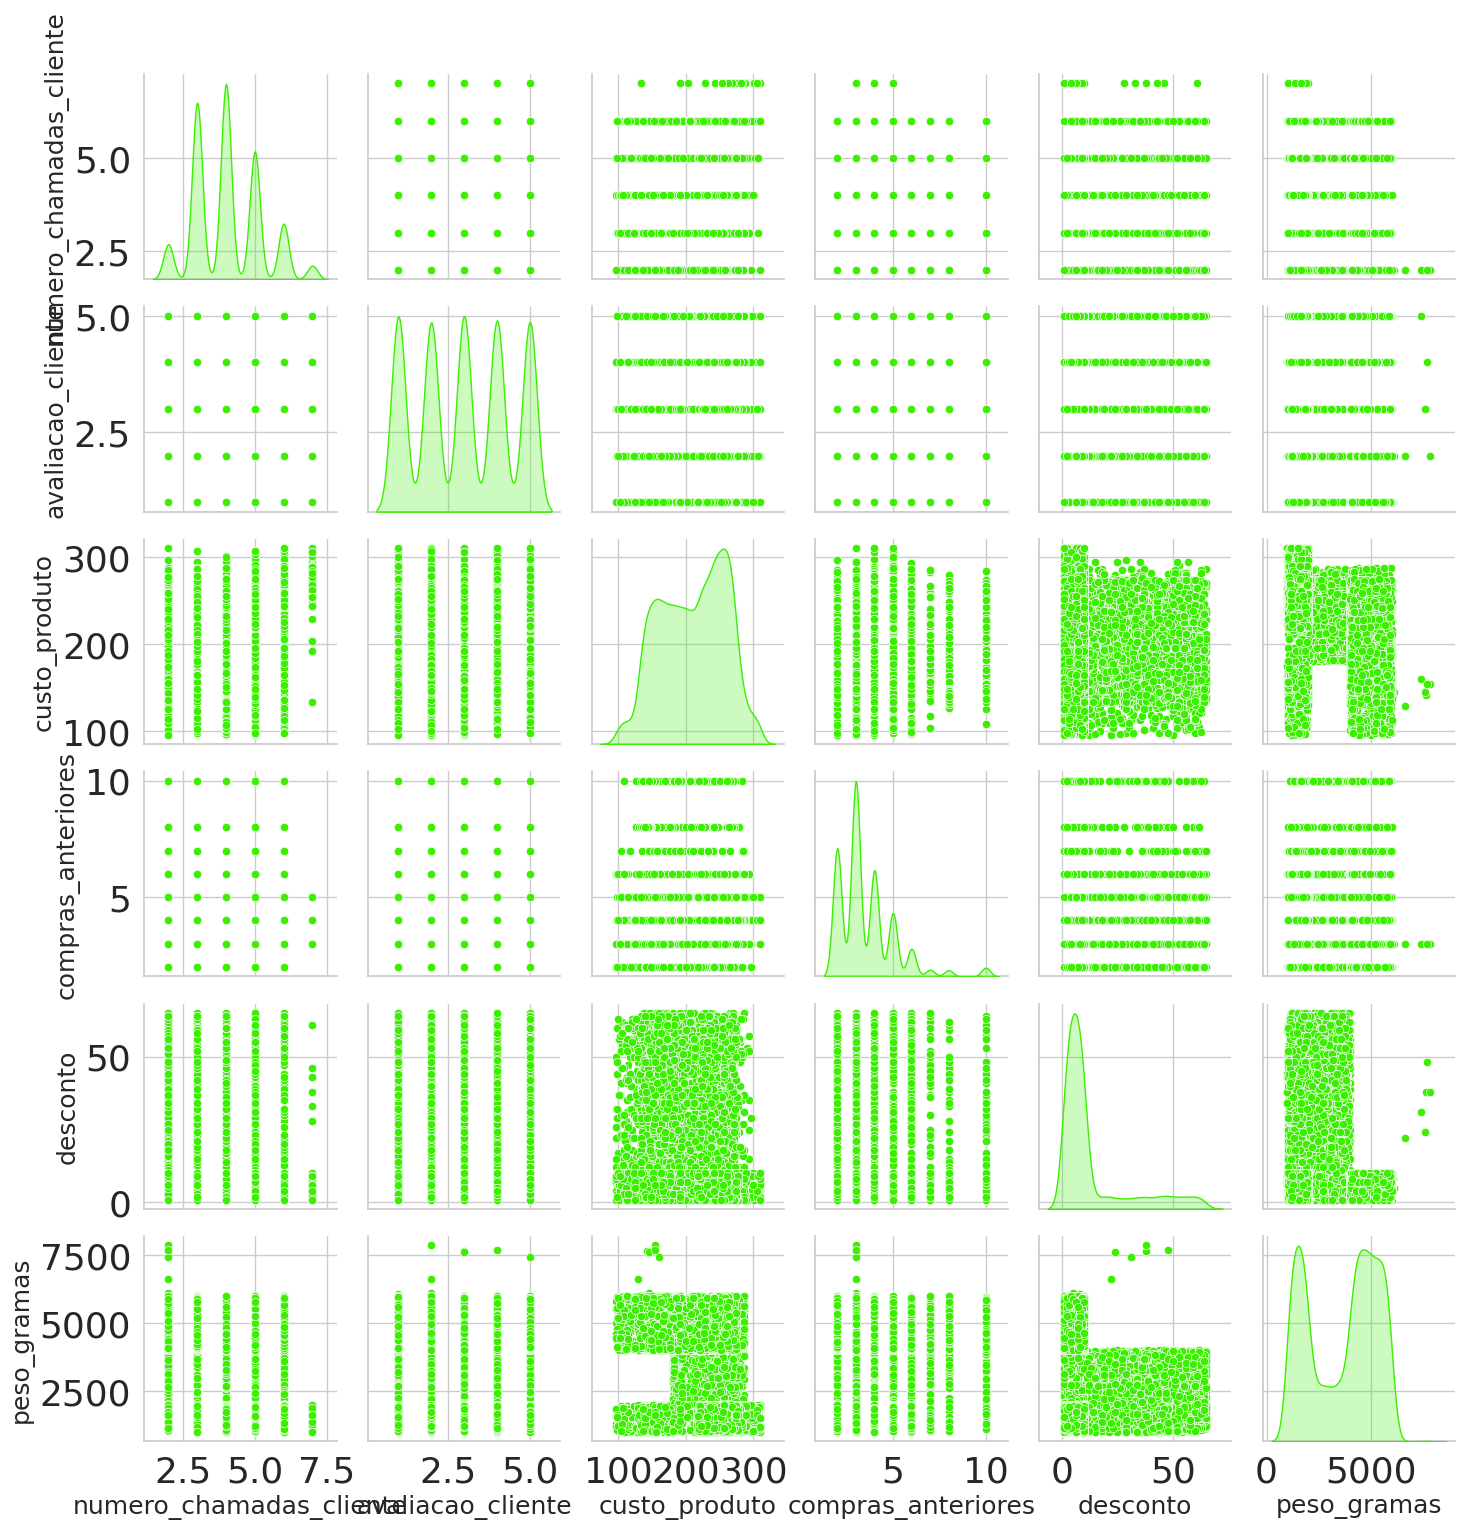

In [146]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde')

## Colunas Categóricas x Variável Target

In [147]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

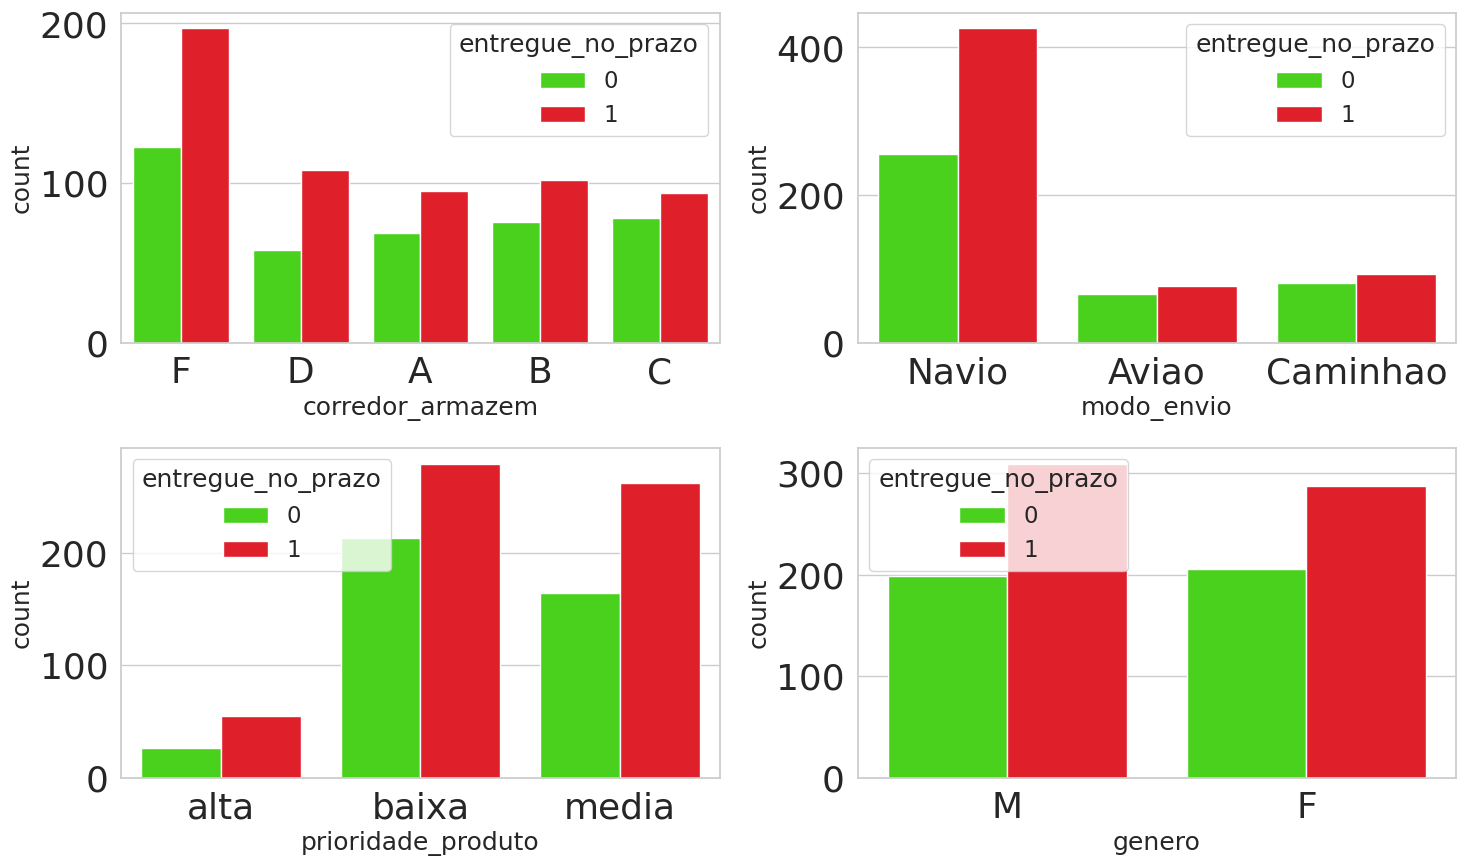

In [148]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Observações:

- Envio por navio tende a apresentar atraso na entrega.
- Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
- Em corredor_armazem produtos do corredor F tendem a aprsentar atraso na entrega.
- Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitos no prazo.

## Conclusão da Parte 1 da EDA:

Algumas das coisas que encontramos neste conjunto de dados são:

- Os dados parecem válidos e não há defeitos maiores/significativos.
- Existem algumas distribuições que são um pouco assimétricas, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.
- Não detectamos problemas de multicolinearidade.
- Alguns recursos parecem completamente não correlacionados.
- Dos recursos categóricos, modo_envio, corredor_armazem e importancia_produto parecem úteis para prever a variável target.

# EDA - Parte 2

### 1 - Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?

In [71]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [72]:
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [73]:
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'})
df_group1 = df_group1.reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [74]:
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [75]:
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [76]:
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index()
df_group4


,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [77]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [78]:
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [79]:
df_group5.columns = ['Status de Entrega no Prazo',
                     'Modo de Envio',
                     'Total por Categoria',
                     'Total Geral',
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


Text(-0.5, 4900, 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.')

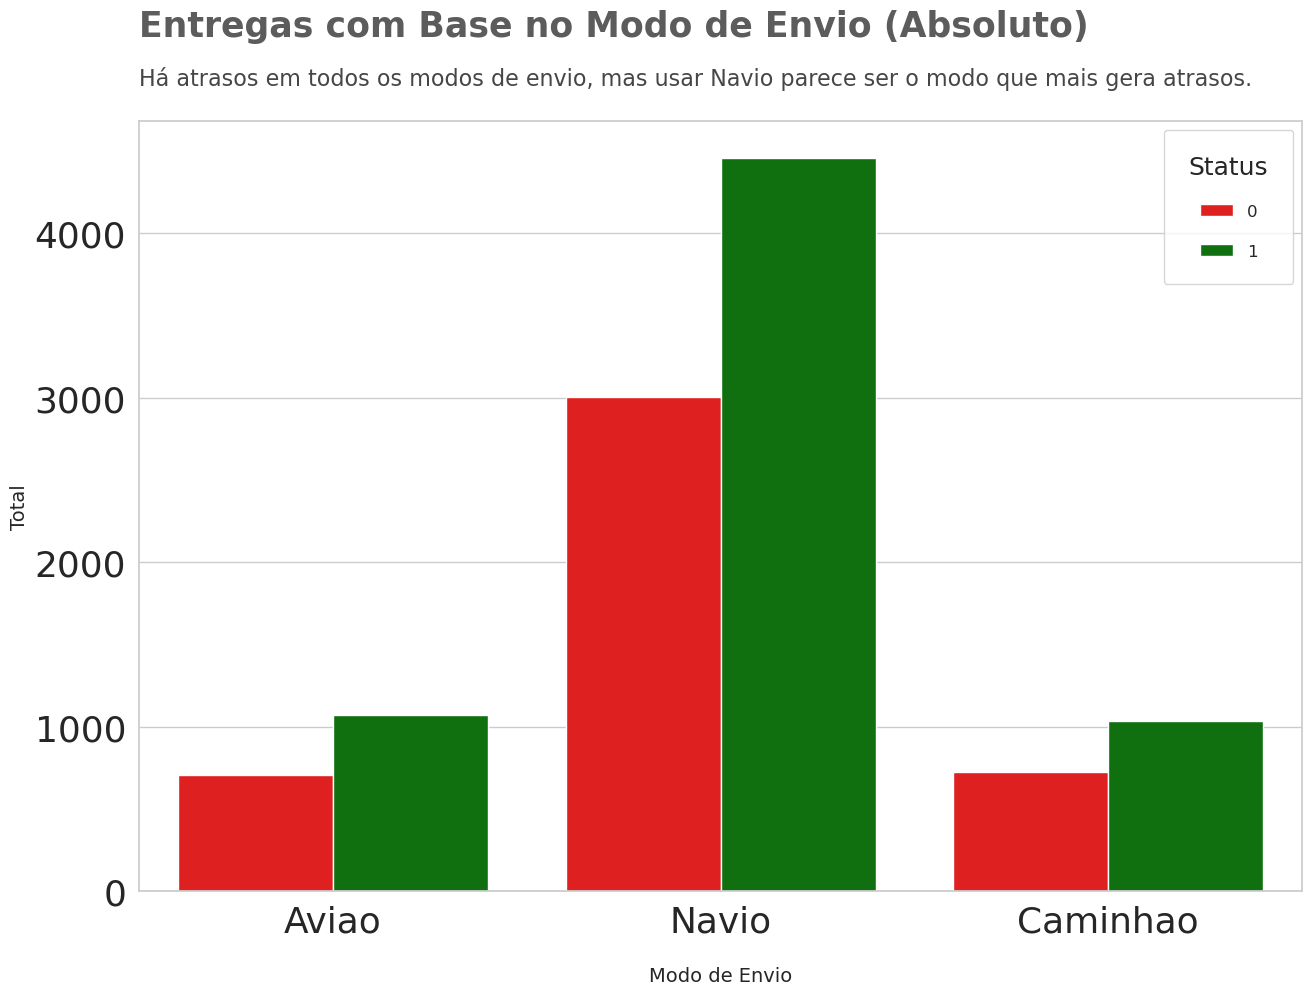

In [80]:
# Gráfico 1 - Análise em Valores Absolutos

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df,
                     x = 'modo_envio',
                     hue = 'entregue_no_prazo',
                     palette = ['red', 'green'])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)
chart.set_ylabel('Total', fontsize = 14)

# Legenda
plt.legend(loc = 'upper right',
            borderpad = 1.5,
            labelspacing = 1.5,
            fontsize = 12,
            title = 'Status')

# Adicionando Título
chart.text(x = -0.5,
           y = 5200,
           s = 'Entregas com Base no Modo de Envio (Absoluto)',
           fontsize = 25,
           weight = 'bold',
           alpha = .75)

# Adicionando Sub-Título
chart.text(x = -0.5,
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16,
           alpha = .85)

Text(-0.5, 64, 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, apesar dos volumes variados de envios')

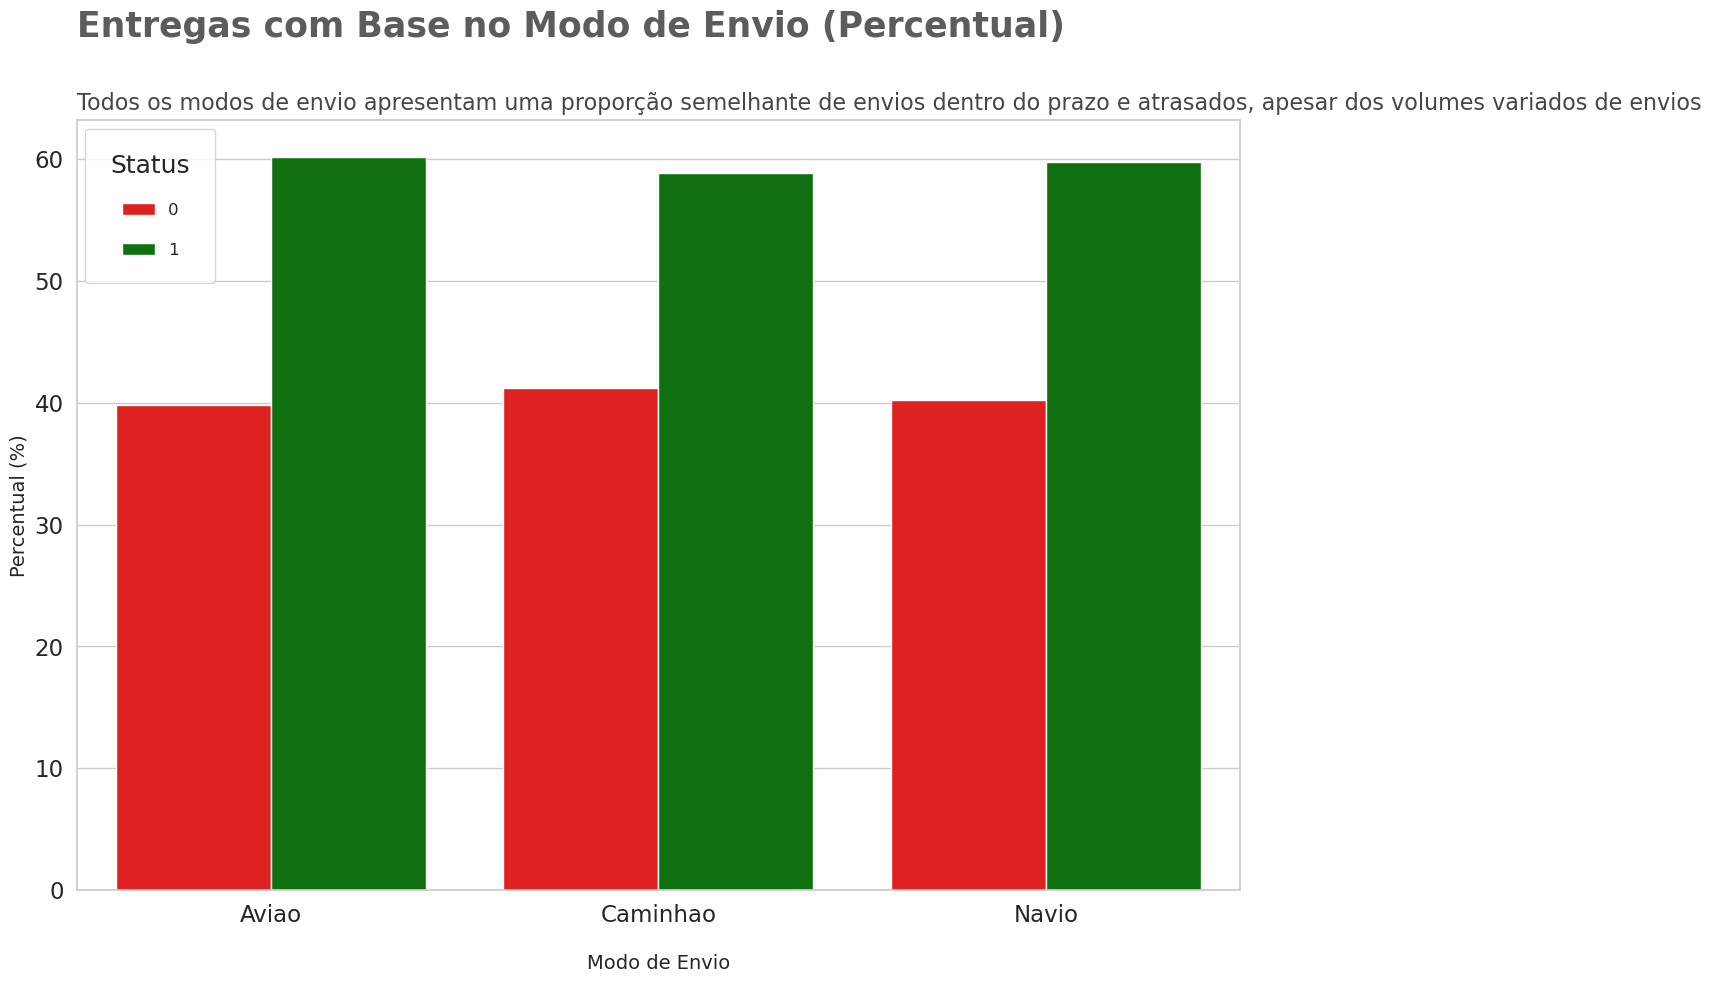

In [83]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio',
                    y = 'Percentual(%)',
                    data = df_group5,
                    hue = 'Status de Entrega no Prazo',
                    palette = ['red', 'green'])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('\nModo de Envio', fontsize = 14)
chart.set_ylabel('Percentual (%)', fontsize = 14)

# Legenda
plt.legend(loc = 'upper left',
            borderpad = 1.5,
            labelspacing = 1.5,
            fontsize = 12,
            title = 'Status')

# Adicionando Título
chart.text(x = -0.5,
           y = 70,
           s = 'Entregas com Base no Modo de Envio (Percentual)',
           fontsize = 25,
           weight = 'bold',
           alpha = .75)

# Adicionando Sub-Título
chart.text(x = -0.5,
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, apesar dos volumes variados de envios',
           fontsize = 16,
           alpha = .85)

## 2 - Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [82]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [154]:
df_group11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID': 'nunique'})
df_group11 = df_group11.reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [155]:
df_group12 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()
df_group12


,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [162]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [158]:
df_group14 = df.groupby('prioridade_produto').agg({'ID': 'nunique'}).reset_index()
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [160]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [164]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo',
                      'Prioridade do Produto',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [165]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo',
                      'Prioridade do Produto',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


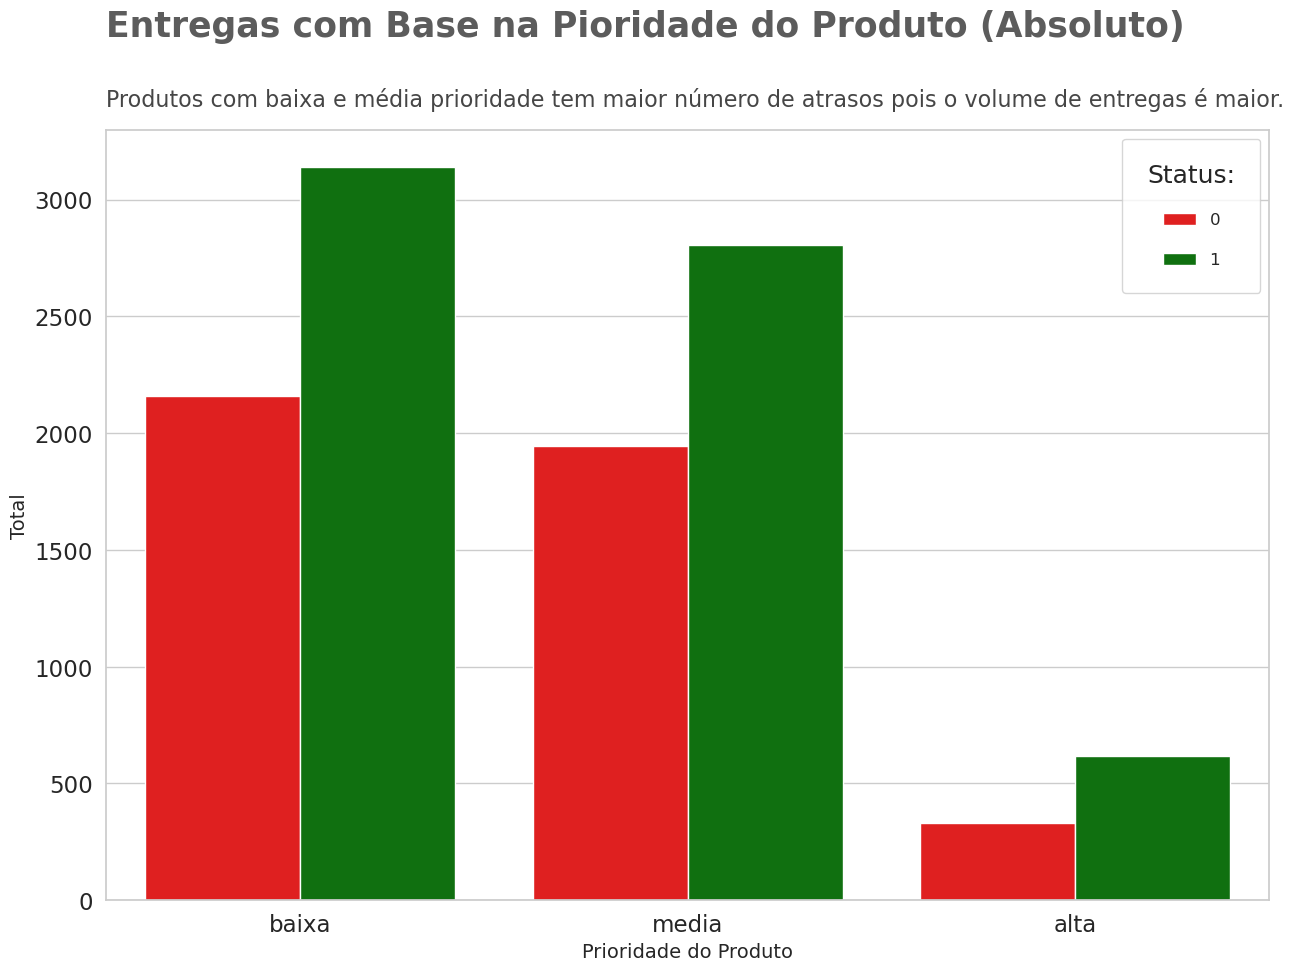

In [168]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15, 10))
chart = sns.countplot(data = df,
                      x = 'prioridade_produto',
                      hue = 'entregue_no_prazo',
                      palette = ['red', 'green'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('Prioridade do Produto', fontsize = 14)
chart.set_ylabel('Total', fontsize = 14)
plt.legend(loc = 'upper right',
           borderpad = 1.5,
           labelspacing = 1.5,
           fontsize = 12,
           title = 'Status:')
chart.text(x = -0.5,
           y = 3700,
           s = 'Entregas com Base na Pioridade do Produto (Absoluto)',
           fontsize = 25,
           weight = 'bold',
           alpha = .75)
chart.text(x = -0.5,
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16,
           alpha = .85);
           


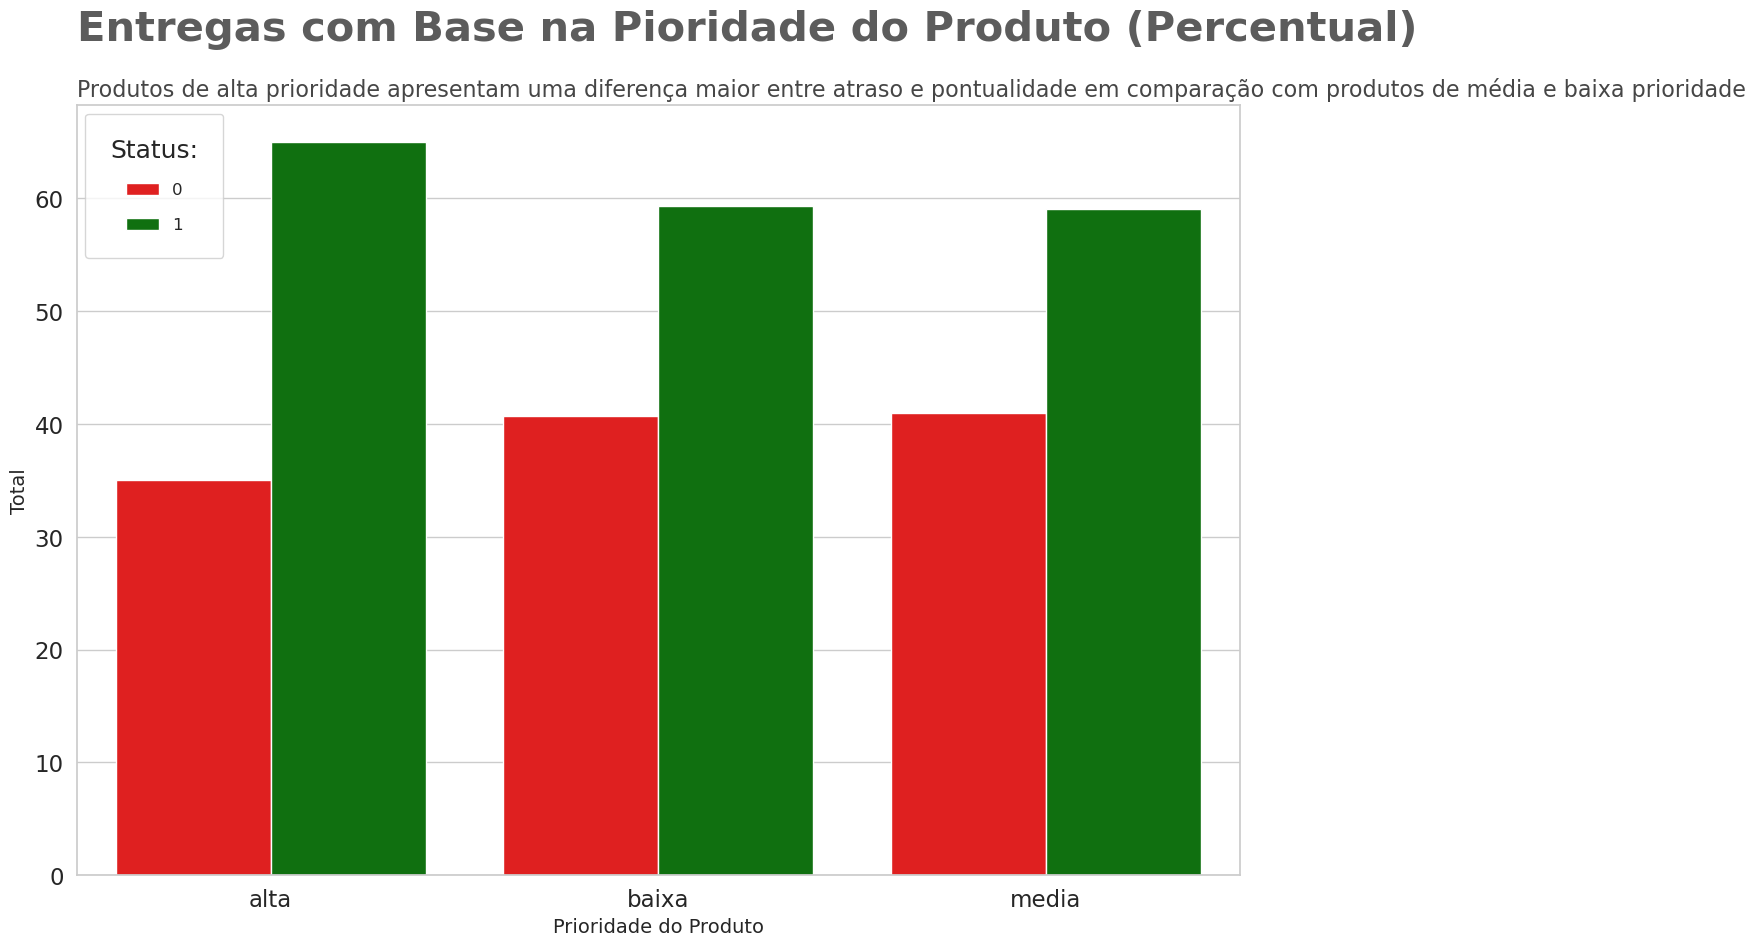

In [169]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15, 10))
chart = sns.barplot(x = 'Prioridade do Produto',
                    y = 'Percentual(%)',
                    data = df_group15,
                    hue = 'Status de Entrega no Prazo',
                    palette = ['red', 'green'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('Prioridade do Produto', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)
plt.legend(loc = 'upper left',
           borderpad = 1.5,
           labelspacing = 1.2,
           fontsize = 12,
           title = 'Status:')
chart.text(x = -0.5,
           y = 74,
           s = 'Entregas com Base na Pioridade do Produto (Percentual)',
           fontsize = 30,
           weight = 'bold',
           alpha = .75)
chart.text(x = -0.5,
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com produtos de média e baixa prioridade',
           fontsize = 16,
           alpha = .85);
           

### 3 - Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [170]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [172]:
df_group21 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [173]:
df_group22 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index()
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [174]:
df_group23 = df_group21.merge(df_group22, on = ['entregue_no_prazo'])
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [176]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo',
                      'Corredor de Armazem',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor de Armazem,Total por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [177]:
df_group24 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index()
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [178]:
df_group25 = df_group21.merge(df_group24, on = ['corredor_armazem'])
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [179]:
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo',
                      'Corredor de Armazem',
                      'Total por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor de Armazem,Total por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


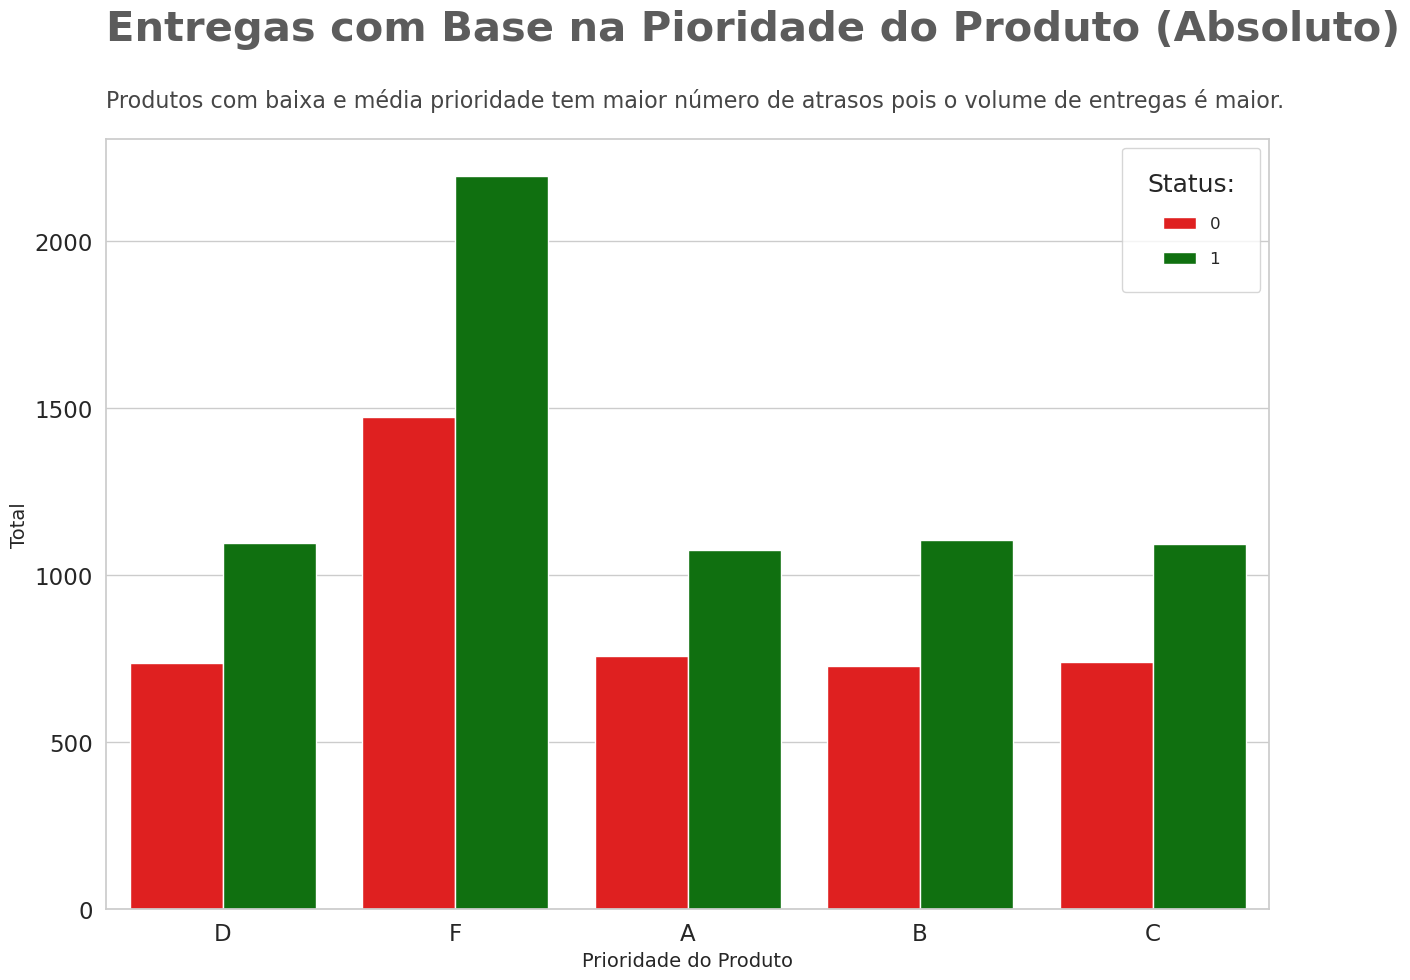

In [180]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15, 10))
chart = sns.countplot(data = df,
                      x = 'corredor_armazem',
                      hue = 'entregue_no_prazo',
                      palette = ['red', 'green'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('Prioridade do Produto', fontsize = 14)
chart.set_ylabel('Total', fontsize = 14)
plt.legend(loc = 'upper right',
           borderpad = 1.5,
           labelspacing = 1.2,
           fontsize = 12,
           title = 'Status:')
chart.text(x = -0.5,
           y = 2600,
           s = 'Entregas com Base na Pioridade do Produto (Absoluto)',
           fontsize = 30,
           weight = 'bold',
           alpha = .75)
chart.text(x = -0.5,
           y = 2400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16,
           alpha = .85);
           

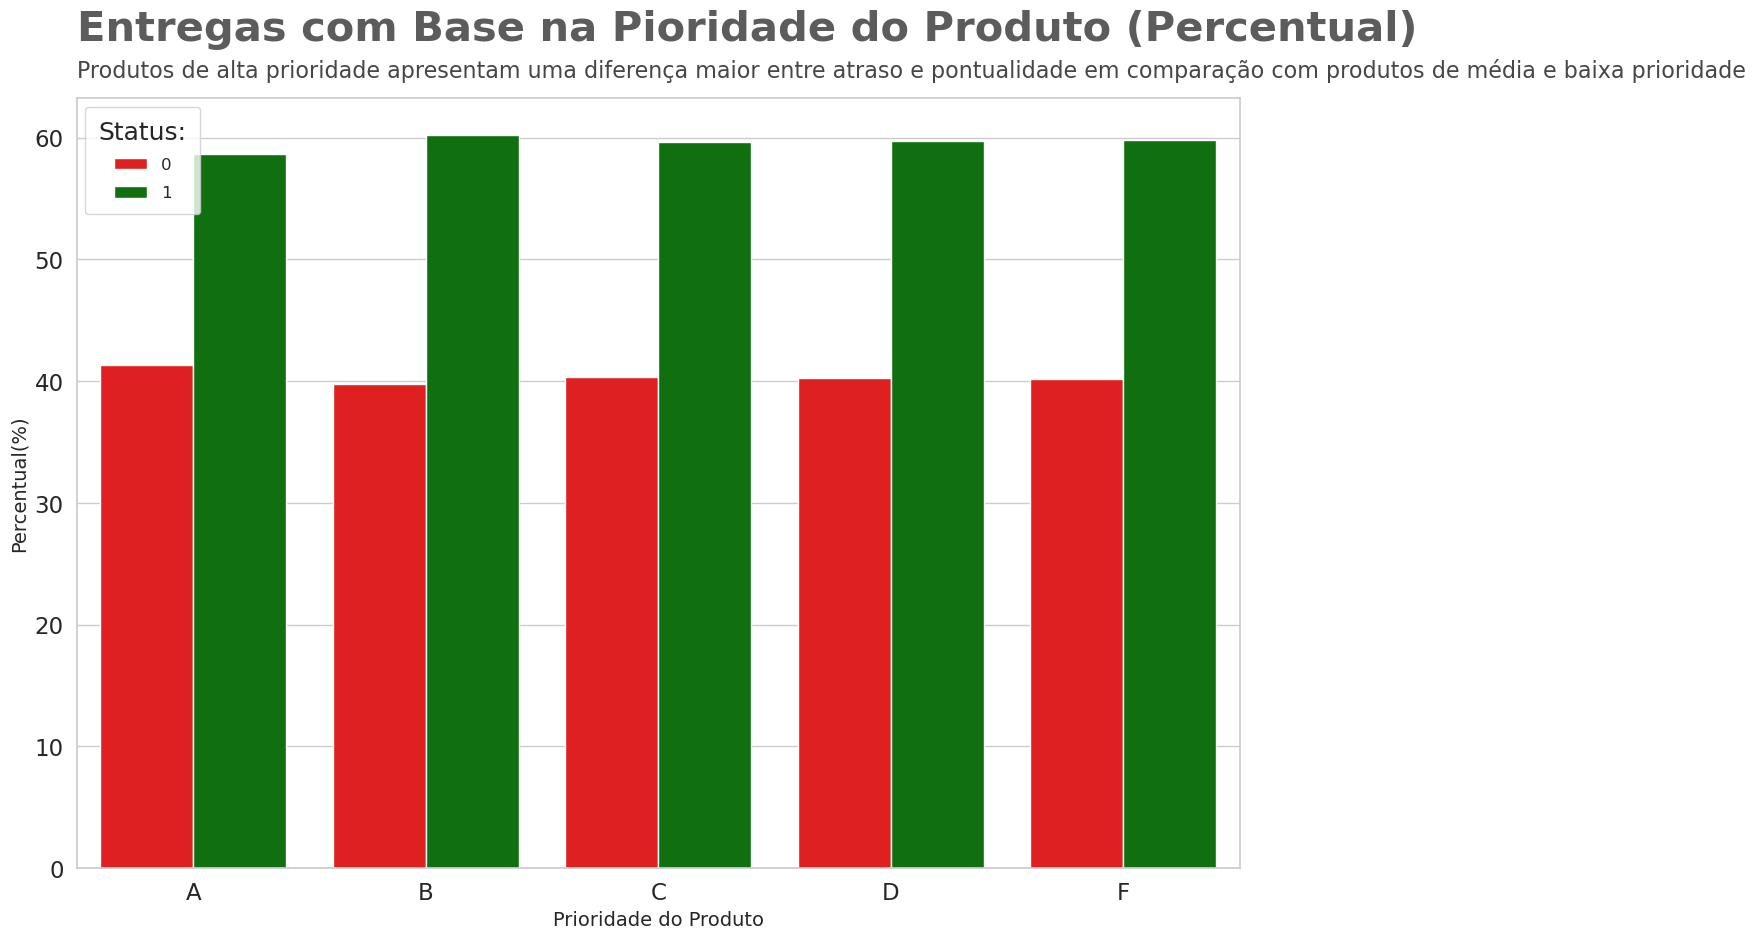

In [185]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15, 10))
chart = sns.barplot(x = 'Corredor de Armazem',
                    y = 'Percentual(%)',
                    data = df_group25,
                    hue = 'Status de Entrega no Prazo',
                    palette = ['red', 'green'])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel('Prioridade do Produto', fontsize = 14)
chart.set_ylabel('Percentual(%)', fontsize = 14)
plt.legend(loc = 'upper left',
           borderpad = 0.8,
           labelspacing = 0.8,
           fontsize = 12,
           title = 'Status:')
chart.text(x = -0.5,
           y = 68,
           s = 'Entregas com Base na Pioridade do Produto (Percentual)',
           fontsize = 30,
           weight = 'bold',
           alpha = .75)
chart.text(x = -0.5,
           y = 65,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com produtos de média e baixa prioridade',
           fontsize = 16,
           alpha = .85);

# Desafio:
## Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?

Responda com apenas um gráfico em uma única linha de códgo!

In [186]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

<AxesSubplot:xlabel='desconto', ylabel='Density'>

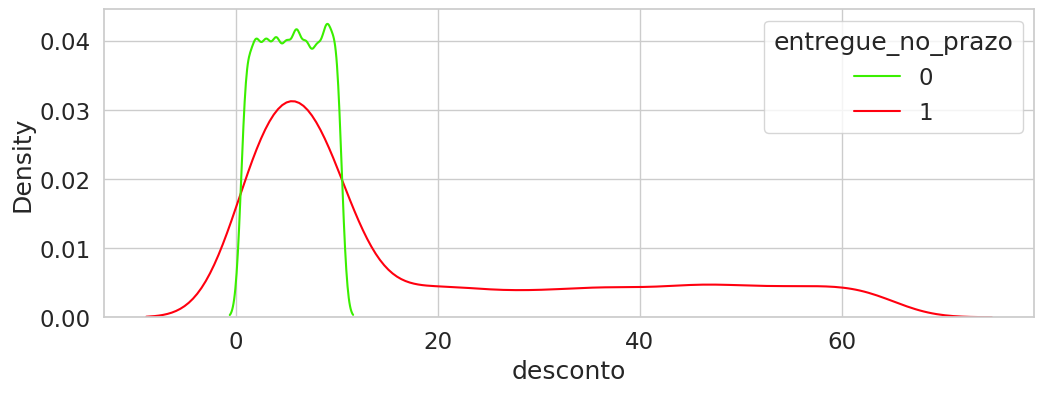

In [193]:
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo')

Resposta: Não influencia, pois com desconto baixo o atraso é maior, mas a quantidade de entregas no prazo também é maior.
